# Выполнение индивидуального задания <br> Практическая работа 8. Анализ метода загрузки данных. <br> Вариант 14

| Вариант | Задание 1: Настройка таблиц | Задание 2: Загрузка малых данных (`sales_small`) | Задание 3: Загрузка больших данных (`sales_big`) | Задание 4: SQL Анализ | Задание 5: Python/Colab Анализ и Визуализация |
| :------ | :-------------------------- | :----------------------------------------------- | :------------------------------------------------ | :-------------------- | :---------------------------------------------- |
| **14**  | Создать таблицы `sales_small`, `sales_big`. | Метод: `copy_expert (file)`                    | Метод: `copy_expert (file)`                       | SQL: Выбрать `id`, `cost` для 5 записей с самой низкой `cost` (>0) в `sales_big`. | Python: Построить гистограмму `cost` из `sales_small`. |

---

In [1]:
# устанавливаем библиотеки
!pip install psycopg2-binary matplotlib numpy

In [2]:
# импортируем библиотеки
import psycopg2
from psycopg2 import Error
from psycopg2 import extras # For execute_values
import matplotlib.pyplot as plt
import numpy as np
import os # To check file existence


In [3]:
!ls

"ls" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [4]:
# Установка и импорт необходимых библиотек.

print("Libraries installed and imported successfully.")

# Данные БД, к которой подключаемся в PostgreSQL
DB_USER = "postgres"
DB_PASSWORD = "111"
DB_HOST = "localhost"
DB_PORT = "5432"
DB_NAME = "lect_08_bda_big_data"

Libraries installed and imported successfully.


In [14]:
# Проверка соединения с базой данных PostgreSQL.
try:
    # устанавливаем связь, используя psycopg2
    print("Connecting to PostgreSQL database using psycopg2...")
    connection = psycopg2.connect(user=DB_USER,
                                  password=DB_PASSWORD,
                                  host=DB_HOST,
                                  port=DB_PORT,
                                  database=DB_NAME)
    connection.autocommit = False # Important for COPY and batch inserts within transactions
    
    cursor = connection.cursor() # создание курсора для операций с БД
    print("Successfully connected to: lect_08_bda_big_data")


except (Exception, Error) as error:
    print(f"Error while connecting to PostgreSQL: {error}")
    # Ensure resources are closed even if connection fails partially
    if cursor:
        cursor.close()
    if connection:
        connection.close()

Connecting to PostgreSQL database using psycopg2...
Successfully connected to: lect_08_bda_big_data


# Задание 1: Настройка таблиц <br> Создать таблицы `sales_small`, `sales_big`


In [15]:
# Создание таблиц
if connection and cursor:
    try:
        cursor.execute("""
                CREATE TABLE IF NOT EXISTS sales_small (
                    id INTEGER PRIMARY KEY,
                    quantity INTEGER,
                    cost NUMERIC(10, 2),
                    total_revenue NUMERIC(12, 2)
                );
            """)
        
        connection.commit()
        print("Таблица sales_small создана")

        cursor.execute("""
                CREATE TABLE IF NOT EXISTS sales_big (
                    id INTEGER PRIMARY KEY,
                    quantity INTEGER,
                    cost NUMERIC(10, 2),
                    total_revenue NUMERIC(12, 2)
                );
            """)
        
        connection.commit()
        print("Таблица sales_big создана")


    except (Exception, Error) as error:
        print(f"Error while connecting to PostgreSQL: {error}")
    # Ensure resources are closed even if connection fails partially
        if cursor:
            cursor.close()
        if connection:
            connection.close()


Таблица sales_small создана
Таблица sales_big создана


# Задания 2: Загрузка малых данных `(sales_small)` <br> Метод: `copy_expert (file)`

In [16]:
# Загрузка малых данных
if connection and cursor:
    try:
        # Пути к файлам
        small_csv_path = r'C:\Users\EnglishMan\Desktop\Уник\2 курс\Практикум по SQL\Лаба 8\upload_test_data.csv'
      
        # Загрузка малого файла в таблицу sales_small
        with open(small_csv_path, 'r', encoding = 'utf-8') as f:
            print("Файл upload_test_data.csv открыт. Начинаем загрузку в таблицу sales_small...")
            cursor.copy_expert(
                sql = """
                COPY sales_small FROM STDIN WITH (FORMAT CSV, HEADER TRUE, DELIMITER ',')
                """,
                file = f
            )
            print("Данные успешно загружены в таблицу sales_small.")

        # Фиксируем изменения
        connection.commit()
        print("Все данные успешно загружены!")
        

    except (Exception, Error) as error:
        print(f"Error while connecting to PostgreSQL: {error}")
    # Ensure resources are closed even if connection fails partially
        if cursor:
            cursor.close()
        if connection:
            connection.close()


Файл upload_test_data.csv открыт. Начинаем загрузку в таблицу sales_small...
Данные успешно загружены в таблицу sales_small.
Все данные успешно загружены!


# Задание 3: Загрузка  больших данных `(sales_big)` <br> Метод: `copy_expert (file)`

In [ ]:
# Загрузка большихх данных
if connection and cursor:
    try:
        # Пути к файлам
        big_csv_path = r'C:\Users\EnglishMan\Desktop\Уник\2 курс\Практикум по SQL\Лаба 8\upload_test_data_big.csv'

        # Загрузка малого файла в таблицу sales_small
        with open (big_csv_path, 'r', encoding = 'utf-8') as f:
            print ("Файл upload_test_data_big.csv открыт. Начинаем загрузку в таблицу sales_big...")
            cursor.copy_expert(
                sql = """
                COPY sales_big FROM STDIN WITH (FORMAT CSV, HEADER TRUE, DELIMITER ',')
                """,
                file = f
            )
            print("Данные успешно загружены в таблицу sales_big.")

        # Фиксируем изменения
        connection.commit()
        print("Все данные успешно загружены!")
        

    except (Exception, Error) as error:
        print(f"Error while connecting to PostgreSQL: {error}")
    # Ensure resources are closed even if connection fails partially
        if cursor:
            cursor.close()
        if connection:
            connection.close()


Файл upload_test_data.csv открыт. Начинаем загрузку в таблицу sales_big...
Данные успешно загружены в таблицу sales_big.
Все данные успешно загружены!


# Задание 4: SQL Анализ <br> SQL: Выбрать `id`, `cost` для 5 записей с самой низкой `cost` (>0) в `sales_big`.

In [ ]:
# SQL анализ
try:
    connection = psycopg2.connect(user=DB_USER,
                                  password=DB_PASSWORD,
                                  host=DB_HOST,
                                  port=DB_PORT,
                                  database=DB_NAME)
    connection.autocommit = False # Important for COPY and batch inserts within transactions
    
    cursor = connection.cursor() # создание курсора для операций с БД


    cursor.execute("""
                select id, min(cost) from sales_big
                where cost > 0
                group by id
                order by cost,id
                limit 5;
            """)
       
    connection.commit()
    print("5 записей с самой низкой ценой большей 0 в `sales_big`")
    for row in cursor:
        print(row) # вывод данных запроса построчно
    

except (Exception, Error) as error:
        print(f"Error while connecting to PostgreSQL: {error}")
    # Ensure resources are closed even if connection fails partially
        if cursor:
            cursor.close()
        if connection:
            connection.close()


5 записей с самой низкой ценой большей 0 в `sales_big`
(100, Decimal('0.01'))
(300, Decimal('0.01'))
(1590, Decimal('0.01'))
(4075, Decimal('0.01'))
(4618, Decimal('0.01'))


# Задание 5: Python/Colab Анализ и Визуализация <br> Python: Построить гистограмму `cost` из `sales_small`.

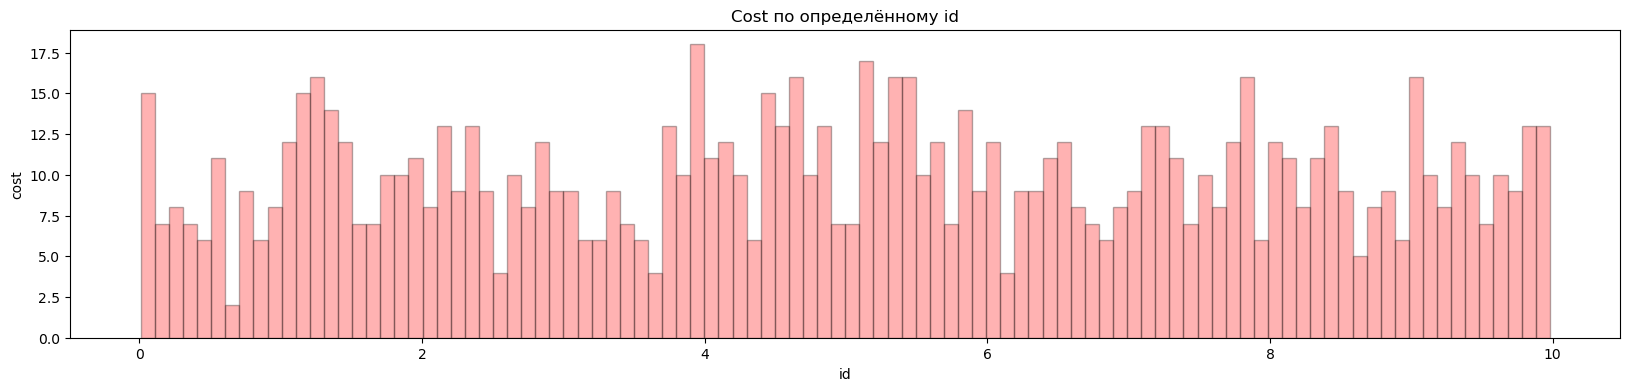

In [68]:
# Построение гистограммы и визуализация результатов
if connection and cursor:
    try:
        connection = psycopg2.connect(user=DB_USER,
                                  password=DB_PASSWORD,
                                  host=DB_HOST,
                                  port=DB_PORT,
                                  database=DB_NAME)
        connection.autocommit = False # Important for COPY and batch inserts within transactions
    
        cursor = connection.cursor() # создание курсора для операций с БД
        cursor.execute("""
                select id, cost 
                from sales_small
                group by id
                order by id, cost;
            """)
        connection.commit()
        data = cursor.fetchall()

        # Разделяем id и cost
        ids = [row[0] for row in data]
        costs = [row[1] for row in data]

        # Построение гистограммы
        plt.figure(figsize=(20, 4))
        plt.hist(costs, bins = 100, color = 'red', edgecolor = 'black', alpha = 0.3)
        plt.title('Cost по определённому id')
        plt.xlabel('id')  # Данные по оси X
        plt.ylabel('cost') # Данные по оси Y
        plt.show()

    
    except (Exception, Error) as error:
        print(f"Error while connecting to PostgreSQL: {error}")
    # Ensure resources are closed even if connection fails partially
        if cursor:
            cursor.close()
        if connection:
            connection.close()